In [1]:
print("hello world")

hello world


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [3]:
## Set style for visualizations

In [5]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
df = pd.read_csv(r'C:\Users\Richwanga\Downloads\Indian_Kids_Screen_Time.csv')
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


# Basic data exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [12]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [8]:
df.shape

(9712, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


df.isnull().sum()

# drop missing values

In [13]:
df = df.dropna()

In [ ]:
df.shape

In [7]:
df['Health_Impacts'] = df['Health_Impacts'].str.split(', ')

In [13]:
df2 = df.explode('Health_Impacts')  # Create a row for each health impact


In [14]:
df2

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,Poor Sleep,Urban
0,14,Male,3.99,Smartphone,True,0.42,Eye Strain,Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
...,...,...,...,...,...,...,...,...
9709,16,Male,5.62,Smartphone,True,0.39,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,Eye Strain,Rural
9709,16,Male,5.62,Smartphone,True,0.39,Anxiety,Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [10]:
df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False)

Age
17    4.639313
16    4.616041
12    4.614210
14    4.577950
13    4.577398
11    4.572981
18    4.565877
15    4.519267
8     4.312396
9     4.273573
10    4.169582
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [11]:
df['Exceeded_Recommended_Limit'].value_counts(normalize=True) * 100

Exceeded_Recommended_Limit
True     89.382995
False    10.617005
Name: proportion, dtype: float64

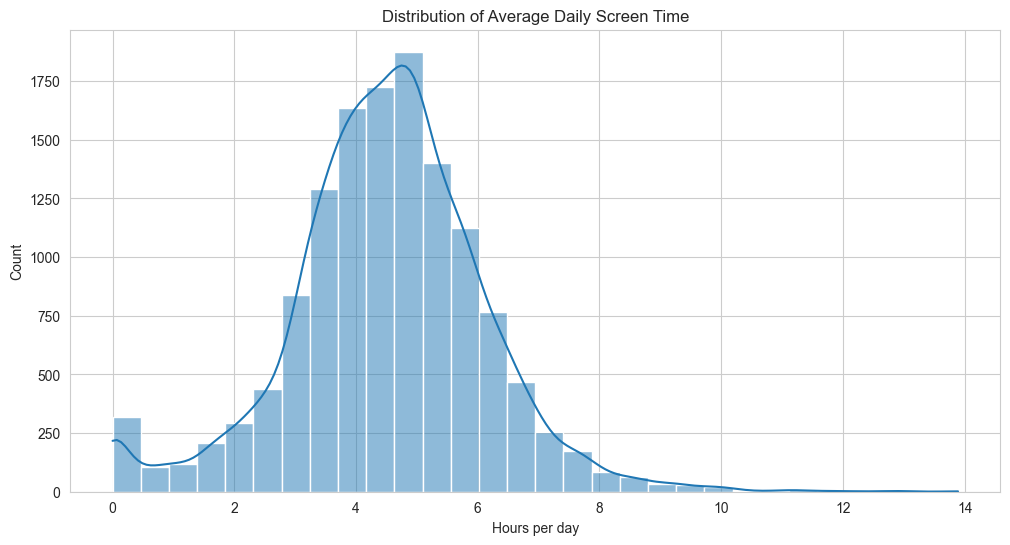

In [15]:
# Distribution of screen time
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', bins=30, kde=True)
plt.title('Distribution of Average Daily Screen Time')
plt.xlabel('Hours per day')
plt.ylabel('Count')
plt.show()


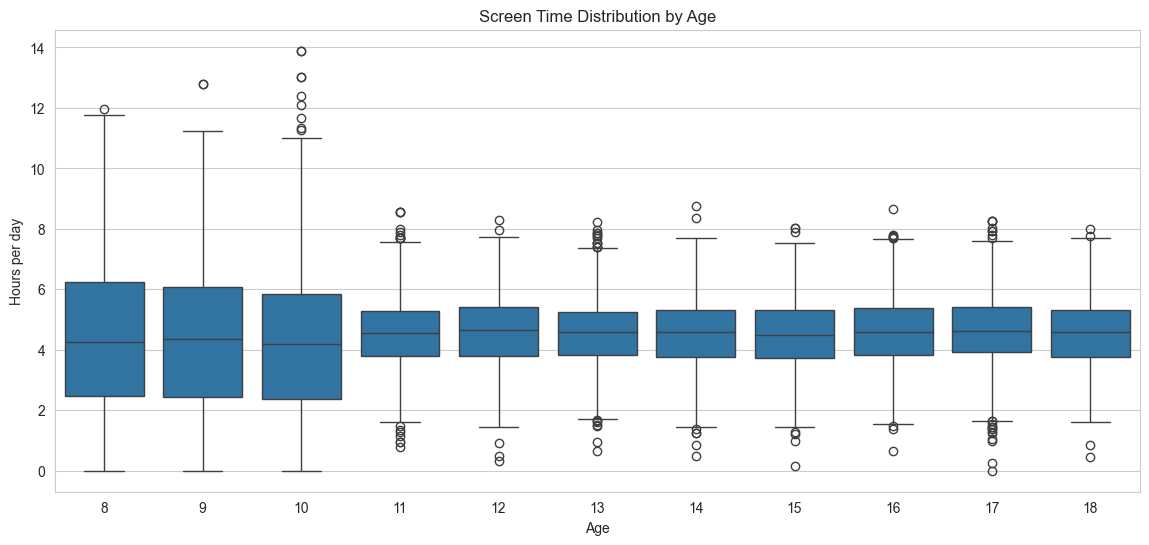

In [17]:
# Screen time by age
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr')
plt.title('Screen Time Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Hours per day')

plt.show()

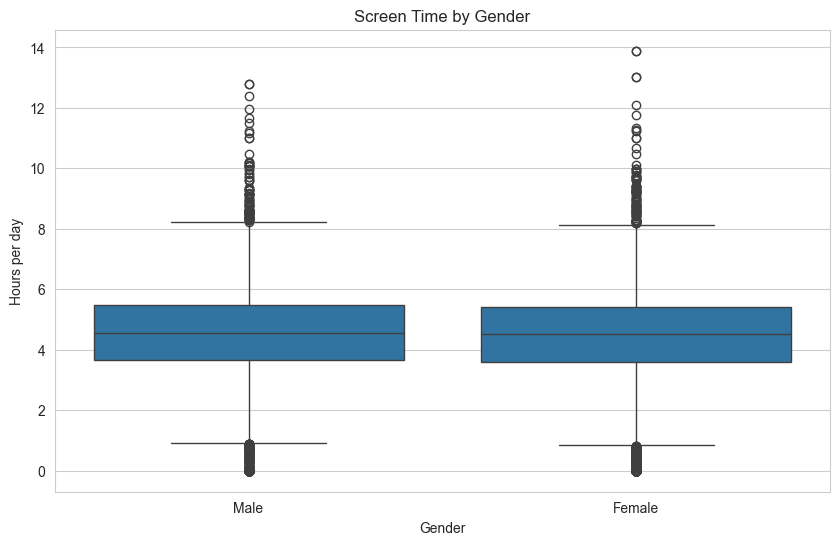

In [18]:
# Screen time by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr')
plt.title('Screen Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per day')
plt.show()


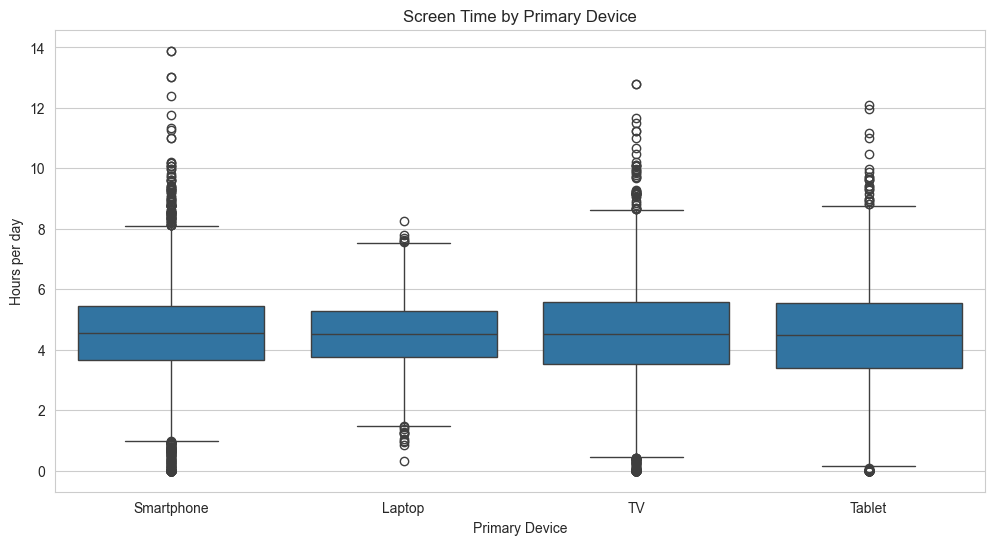

In [21]:
# Screen time by primary device
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', 
            order=df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False).index)
plt.title('Screen Time by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Hours per day')

plt.show()

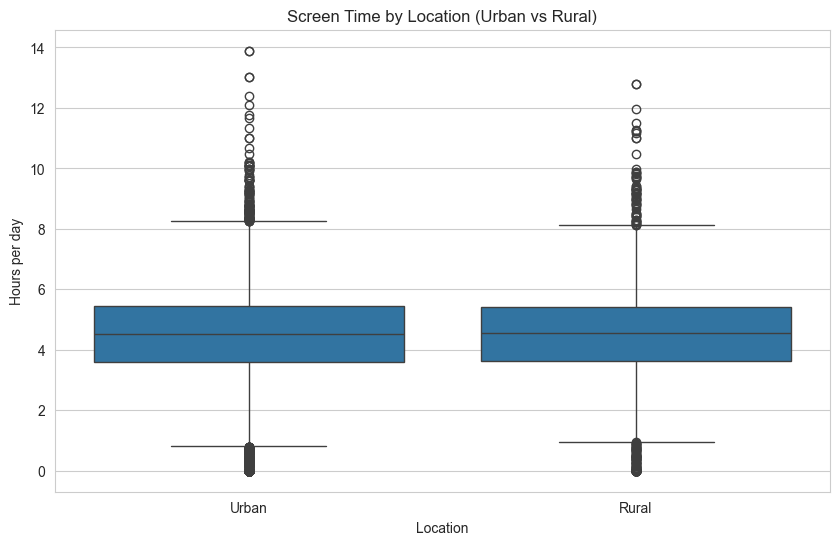

In [22]:
# Screen time by urban/rural
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr')
plt.title('Screen Time by Location (Urban vs Rural)')
plt.xlabel('Location')
plt.ylabel('Hours per day')
plt.show()

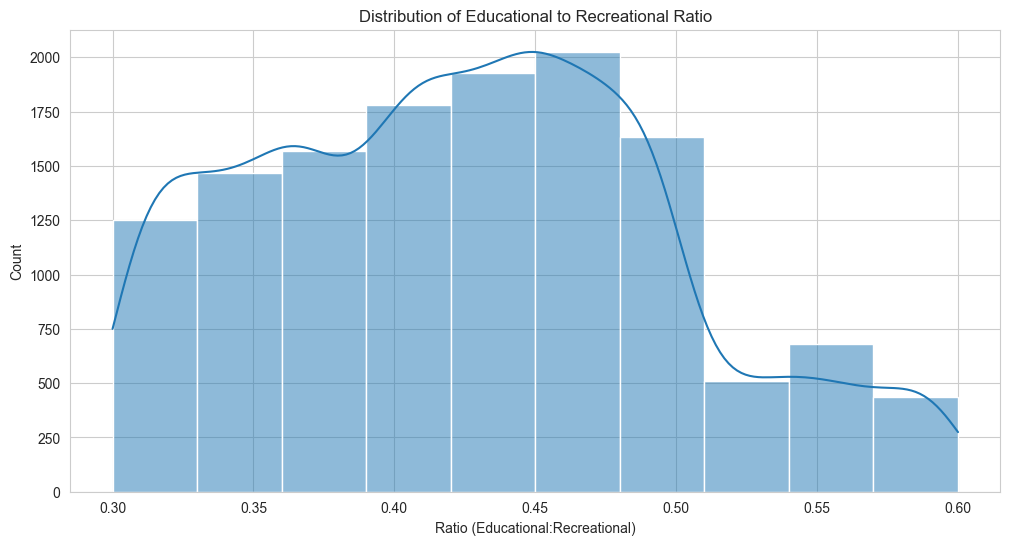

In [26]:
# Educational to recreational ratio
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Educational_to_Recreational_Ratio', bins=10, kde=True)
plt.title('Distribution of Educational to Recreational Ratio')
plt.xlabel('Ratio (Educational:Recreational)')
plt.ylabel('Count')
plt.show()

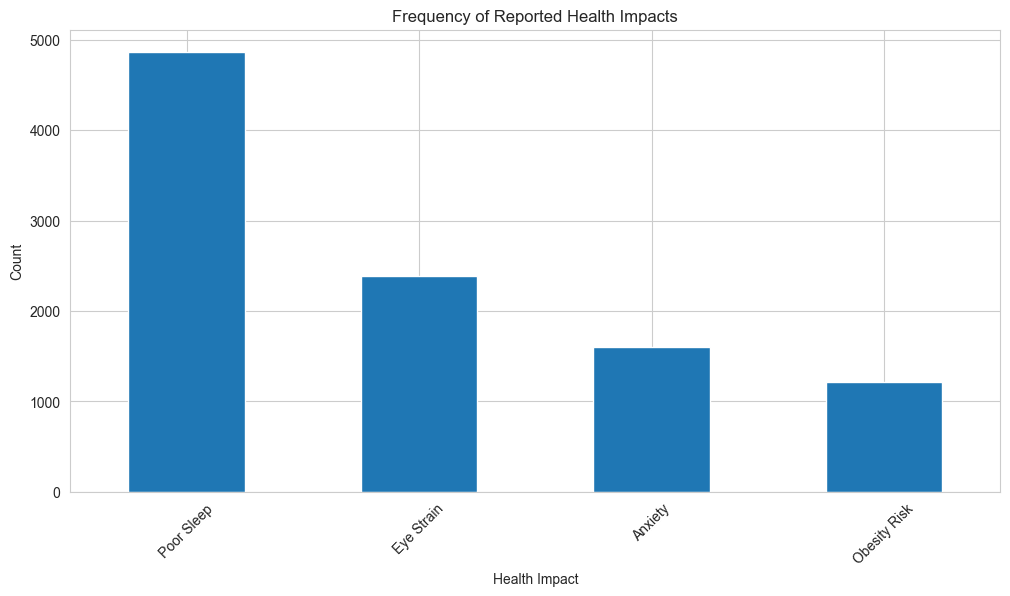

In [30]:
# Health impacts
health_counts = df['Health_Impacts'].value_counts()
plt.figure(figsize=(12, 6))
health_counts[health_counts.index != 'None'].plot(kind='bar')
plt.title('Frequency of Reported Health Impacts')
plt.xlabel('Health Impact')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()

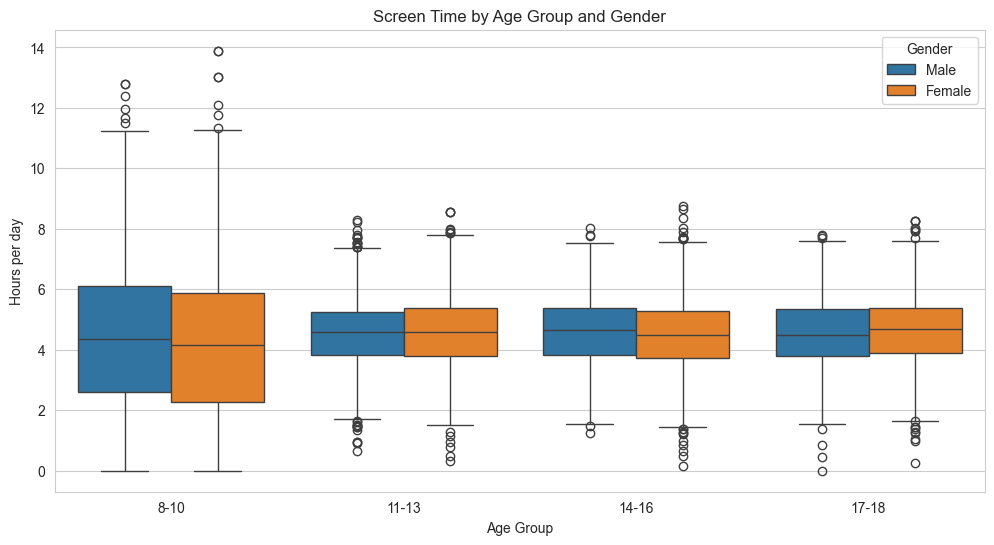

In [34]:
# Age groups analysis
bins = [0, 10, 13, 16, 19]
labels = ['8-10', '11-13', '14-16', '17-18']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', hue='Gender')
plt.title('Screen Time by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Hours per day')
plt.show()


#The bins are interpreted as:

0 < age ≤ 10

10 < age ≤ 13

13 < age ≤ 16

16 < age ≤ 19

In [37]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Group
0,14,Male,3.99,Smartphone,True,0.42,Poor Sleep,Urban,14-16
0,14,Male,3.99,Smartphone,True,0.42,Eye Strain,Urban,14-16
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11-13
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,17-18
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,14-16
...,...,...,...,...,...,...,...,...,...
9709,16,Male,5.62,Smartphone,True,0.39,Poor Sleep,Rural,14-16
9709,16,Male,5.62,Smartphone,True,0.39,Eye Strain,Rural,14-16
9709,16,Male,5.62,Smartphone,True,0.39,Anxiety,Rural,14-16
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,17-18


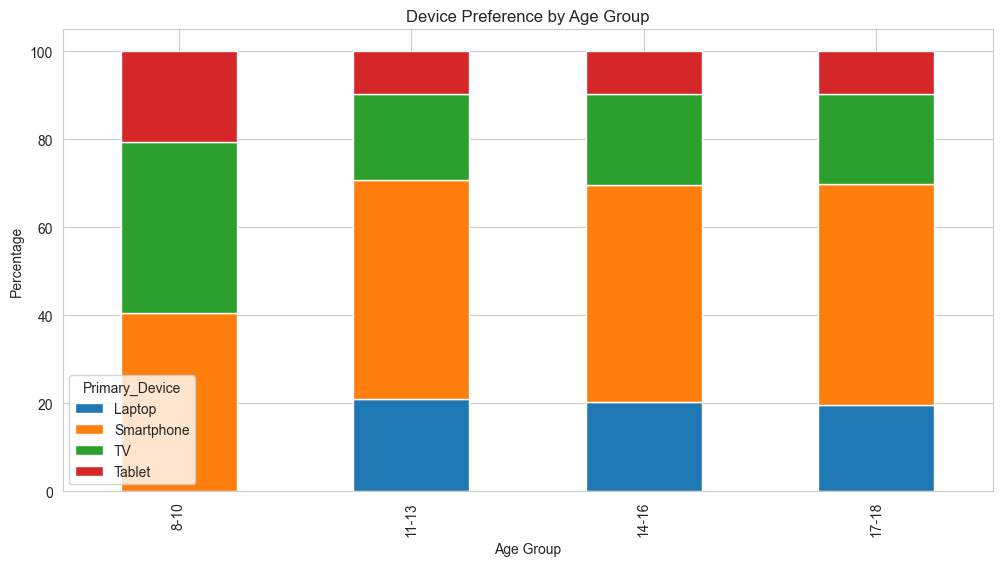

In [36]:
# Device preference by age group
device_by_age = pd.crosstab(df['Age_Group'], df['Primary_Device'], normalize='index') * 100 ## Convert proportions to percentages

device_by_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Device Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

plt.show()

In [38]:
df3 =device_by_age
df3

#pd.crosstab()

Creates a frequency table (counts) of devices (Primary_Device) for each age group (Age_Group).

Primary_Device,Laptop,Smartphone,TV,Tablet
Age_Group,,,,
8-10,0.000000,40.493901,38.857483,20.648616
11-13,20.967742,49.731183,19.543011,9.758065
14-16,20.203917,49.530453,20.606386,9.659243
17-18,19.701853,50.241741,20.346495,9.709911


In [1]:
# Test difference between urban and rural
urban_times = df[df['Urban_or_Rural'] == 'Urban']['Avg_Daily_Screen_Time_hr']
rural_times = df[df['Urban_or_Rural'] == 'Rural']['Avg_Daily_Screen_Time_hr']
t_stat, p_val = stats.ttest_ind(urban_times, rural_times, equal_var=False)

NameError: name 'df' is not defined